<a href="https://colab.research.google.com/github/vinay-jose/misc-colab/blob/main/PPF_Interest_Rates_and_Limit_of_Investments(1968_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
# Read the original CSV
df = pd.read_csv('data.csv', parse_dates=['Start Date', 'End Date'])

# Sort dataframe by start date
df = df.sort_values('Start Date')

df.head()

,Start Date,End Date,Interest Rate,Limit for Investment
0,1968-04-01,1969-03-31,4.8,15000
1,1969-04-01,1970-03-31,4.8,15000
2,1970-04-01,1971-03-31,5.0,15000
3,1971-04-01,1972-03-31,5.0,15000
4,1972-04-01,1973-03-31,5.0,20000


In [ ]:
# Function to fill in missing years
def extrapolate_data(df):
    # Create a new dataframe to store extrapolated data
    extrapolated_data = []

    # Track the last known interest rate and investment limit
    last_rate = None
    last_limit = None

    # Iterate through 1968 to 2024
    for year in range(1968, 2025):
        # Find the row for this year
        matching_row = df[(df['Start Date'].dt.year <= year) & (df['End Date'].dt.year >= year)]

        if not matching_row.empty:
            # If an exact match is found, use those values
            row = matching_row.iloc[0]
            last_rate = row['Interest Rate']
            last_limit = row['Limit for Investment']
        else:
            # If no match, use the last known values
            if last_rate is None or last_limit is None:
                # Use the first available values if no previous values exist
                first_row = df.iloc[0]
                last_rate = first_row['Interest Rate']
                last_limit = first_row['Limit for Investment']

        # Create a row for the year
        extrapolated_data.append({
            'Year': year,
            'Interest Rate': last_rate,
            'Limit for Investment': last_limit
        })

    return pd.DataFrame(extrapolated_data)

In [ ]:
# Generate extrapolated data
extrapolated_df = extrapolate_data(df)
extrapolated_df

,Year,Interest Rate,Limit for Investment
0,1968,4.8,15000
1,1969,4.8,15000
2,1970,4.8,15000
3,1971,5.0,15000
4,1972,5.0,15000
5,1973,5.0,20000
6,1974,5.3,20000
7,1975,7.0,20000
8,1976,7.0,20000
9,1977,7.0,20000


In [ ]:
# Save to CSV
extrapolated_df.to_csv('extrapolated_interest_rates.csv', index=False)

In [ ]:
# Use a built-in matplotlib style
plt.style.use('default')

In [ ]:
# Read the extrapolated CSV
df = pd.read_csv('extrapolated_interest_rates.csv')

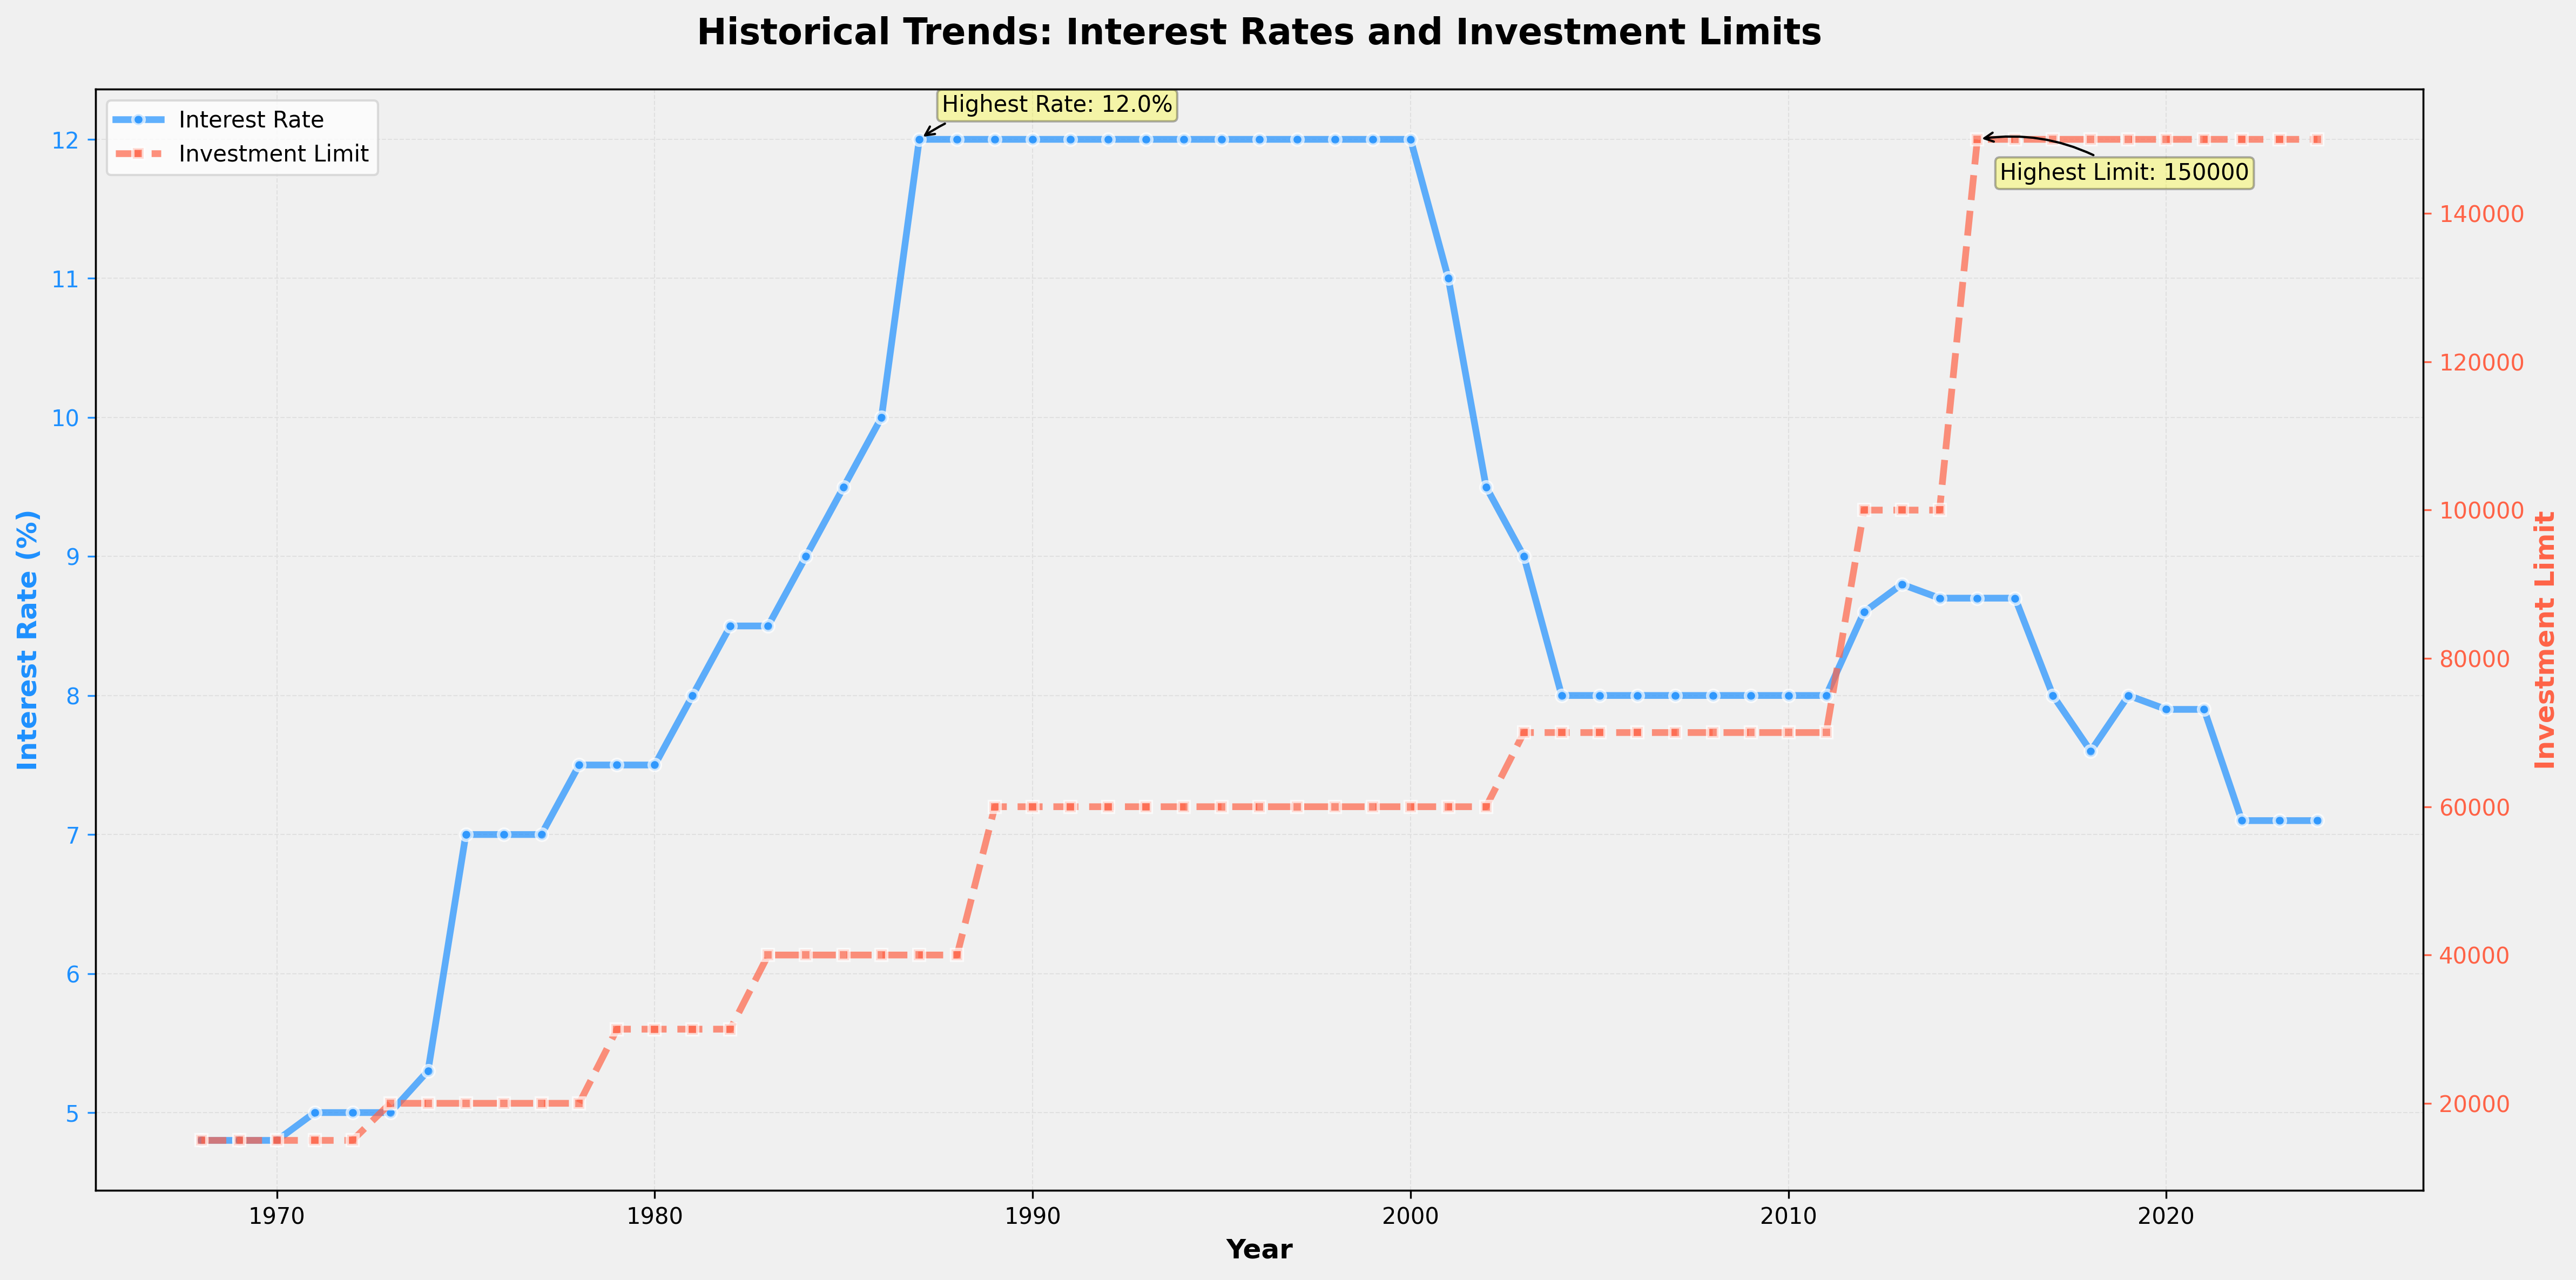

In [ ]:
# Create a figure with improved aesthetics
fig, ax1 = plt.subplots(figsize=(16, 8), dpi=300)

# Gradient background
plt.gca().set_facecolor('#f0f0f0')
fig.patch.set_facecolor('#f0f0f0')

# Plot Interest Rate with improved styling
color1 = '#1E90FF'  # Dodger Blue
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Interest Rate (%)', color=color1, fontsize=12, fontweight='bold')
line1 = ax1.plot(extrapolated_df['Year'], extrapolated_df['Interest Rate'], color=color1, linewidth=3,
                 label='Interest Rate', marker='o', markersize=5,
                 markeredgecolor='white', markeredgewidth=1.5,
                 linestyle='-', alpha=0.7)
ax1.tick_params(axis='y', colors=color1)

# Create a secondary y-axis for Investment Limit
ax2 = ax1.twinx()
color2 = '#FF6347'  # Tomato Red
ax2.set_ylabel('Investment Limit', color=color2, fontsize=12, fontweight='bold')
line2 = ax2.plot(extrapolated_df['Year'], extrapolated_df['Limit for Investment'], color=color2, linewidth=3,
                 label='Investment Limit', marker='s', markersize=5,
                 markeredgecolor='white', markeredgewidth=1.5,
                 linestyle='--', alpha=0.7)
ax2.tick_params(axis='y', colors=color2)

# Add grid for better readability
ax1.grid(True, linestyle='--', linewidth=0.5, color='#e0e0e0')

# Title with custom styling
plt.title('Historical Trends: Interest Rates and Investment Limits',
          fontsize=16, fontweight='bold', pad=20)

# Improve x-axis readability
plt.xticks(rotation=45, ha='right')

# Add subtle annotations for key points
max_rate_year = extrapolated_df.loc[extrapolated_df['Interest Rate'].idxmax(), 'Year']
max_limit_year = extrapolated_df.loc[extrapolated_df['Limit for Investment'].idxmax(), 'Year']

ax1.annotate(f'Highest Rate: {extrapolated_df["Interest Rate"].max()}%',
             xy=(max_rate_year, extrapolated_df['Interest Rate'].max()),
             xytext=(10, 10), textcoords='offset points',
             ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))

ax2.annotate(f'Highest Limit: {extrapolated_df["Limit for Investment"].max()}',
             xy=(max_limit_year, extrapolated_df['Limit for Investment'].max()),
             xytext=(10, -10), textcoords='offset points',
             ha='left', va='top',
             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2,
           loc='upper left', frameon=True,
           facecolor='white', edgecolor='lightgray')

# Adjust layout and save
plt.tight_layout()

In [ ]:
# Print out some insights
print("Visualization Insights:")
print(f"Highest Interest Rate: {df['Interest Rate'].max()}% (Year: {max_rate_year})")
print(f"Highest Investment Limit: {df['Limit for Investment'].max()} (Year: {max_limit_year})")

Visualization Insights:
Highest Interest Rate: 12.0% (Year: 1987)
Highest Investment Limit: 150000 (Year: 2015)


In [ ]:
plt.savefig('ppf_interest_rates_plot.png',
            facecolor=fig.get_facecolor(),
            edgecolor='none',
            bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

| Start Date | End Date   | Interest Rate | Limit for Investment |
|------------|------------|---------------|----------------------|
| 1968-04-01 | 1969-03-31 | 4.80          | 15000                |
| 1969-04-01 | 1970-03-31 | 4.80          | 15000                |
| 1970-04-01 | 1971-03-31 | 5.00          | 15000                |
| 1971-04-01 | 1972-03-31 | 5.00          | 15000                |
| 1972-04-01 | 1973-03-31 | 5.00          | 20000                |
| 1973-04-01 | 1974-03-31 | 5.30          | 20000                |
| 1974-04-01 | 1974-07-31 | 5.80          | 20000                |
| 1974-08-01 | 1975-03-31 | 7.00          | 20000                |
| 1975-04-01 | 1976-03-31 | 7.00          | 20000                |
| 1976-04-01 | 1977-03-31 | 7.00          | 20000                |
| 1977-04-01 | 1978-03-31 | 7.50          | 20000                |
| 1978-04-01 | 1979-03-31 | 7.50          | 30000                |
| 1979-04-01 | 1980-03-31 | 7.50          | 30000                |
| 1980-04-01 | 1981-03-31 | 8.00          | 30000                |
| 1981-04-01 | 1982-03-31 | 8.50          | 30000                |
| 1982-04-01 | 1983-03-31 | 8.50          | 40000                |
| 1983-04-01 | 1984-03-31 | 9.00          | 40000                |
| 1984-04-01 | 1985-03-31 | 9.50          | 40000                |
| 1985-04-01 | 1986-03-31 | 10.00         | 40000                |
| 1986-04-01 | 1988-03-31 | 12.00         | 40000                |
| 1988-04-01 | 1999-03-31 | 12.00         | 60000                |
| 1999-04-01 | 2000-01-14 | 12.00         | 60000                |
| 2000-01-15 | 2001-02-28 | 11.00         | 60000                |
| 2001-03-01 | 2002-02-28 | 9.50          | 60000                |
| 2002-03-01 | 2002-03-31 | 9.00          | 60000                |
| 2002-04-01 | 2003-02-28 | 9.00          | 70000                |
| 2003-03-01 | 2011-03-31 | 8.00          | 70000                |
| 2011-04-01 | 2011-11-30 | 8.00          | 100000               |
| 2011-12-01 | 2012-03-31 | 8.60          | 100000               |
| 2012-04-01 | 2013-03-31 | 8.80          | 100000               |
| 2013-04-01 | 2014-03-31 | 8.70          | 100000               |
| 2014-04-01 | 2016-03-31 | 8.70          | 150000               |
| 2016-04-01 | 2016-09-30 | 8.10          | 150000               |
| 2016-10-01 | 2017-03-31 | 8.00          | 150000               |
| 2017-04-01 | 2017-06-30 | 7.90          | 150000               |
| 2017-07-01 | 2017-09-30 | 7.80          | 150000               |
| 2018-01-01 | 2018-09-30 | 7.60          | 150000               |
| 2018-10-01 | 2019-06-30 | 8.00          | 150000               |
| 2019-07-01 | 2020-03-31 | 7.90          | 150000               |
| 2020-04-01 | 2020-09-30 | 7.10          | 150000               |
| 2022-10-01 | 2022-12-31 | 7.10          | 150000               |
| 2023-01-01 | 2023-03-31 | 7.10          | 150000               |
